In [1]:
from KRZmetric import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename='C:/Users/HP/Documents/Visual Studio 2015/Projects/multiple_d/multiple_d/trace_M200000_spin0.500000_e0.500000_p6.000000_d10.200000_d20.000000_d30.000000.dat'

In [3]:
index,tau,t,r,th,phi,ut,ur,uth,up,Ft,Fr,Fth,Fp=np.loadtxt(filename,unpack=True)

In [4]:
omg=getfreq_sec_frommaxi(t,r,phi,2e5)

In [5]:
omg

array([ 0.02718257,  0.0507639 ])

In [6]:
def funma(x):
    M=x[0]
    a=x[1]
    return getfreq_sec_fromepma(0.5,6.0,M,a)-omg

In [7]:
from scipy.optimize import fsolve

In [8]:
myM,mya=fsolve(funma,[2e5,0.5])

In [9]:
myM,mya

(201018.10296621057, 0.61749613985419971)

In [10]:
krzw=getwave(filename,M=2e5)

In [11]:
def funep(x):
    e=x[0]
    p=x[1]
    return getfreq_sec_fromepma(e,p,2e5,0.5)-omg

In [12]:
mye,myp=fsolve(funep,[0.5,6])

In [13]:
mye,myp

(0.40926185602620341, 6.4811497014931163)

In [14]:
maw=getwave('C:/Users/HP/Documents/Visual Studio 2015/Projects/multiple_d/multiple_d/trace_M201018_spin0.617496_e0.500000_p6.000000_d10.000000_d20.000000_d30.000000.dat',
            M=myM)

D:\ProgramFiles\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


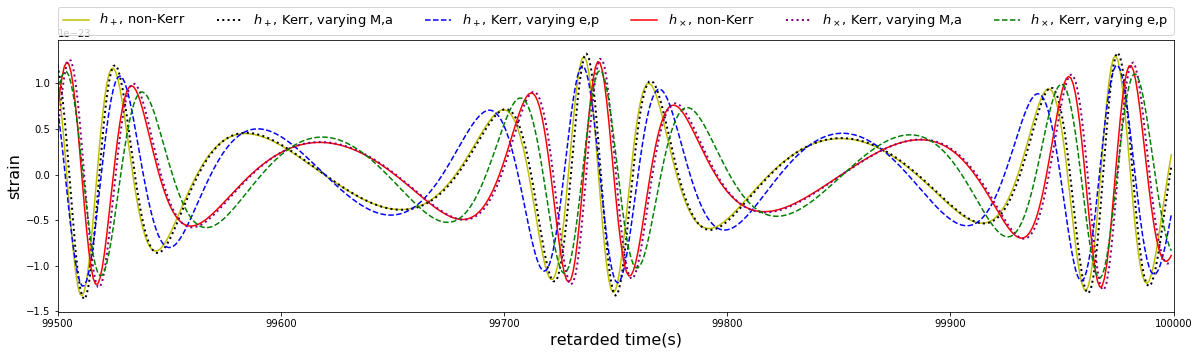

In [21]:
plt.figure(figsize=[20,5])
plt.plot(krzw[0],krzw[1],'y',label='$h_+$, non-Kerr')
plt.plot(maw[0],maw[1],'k:',linewidth=2,label='$h_+$, Kerr, varying M,a')
plt.plot(epw[0],epw[1],'b--',label='$h_+$, Kerr, varying e,p')
plt.plot(krzw[0],np.imag(krzw[1]),'r',label='$h_\\times$, non-Kerr')
plt.plot(maw[0],np.imag(maw[1]),':',color='purple',linewidth=2,label='$h_\\times$, Kerr, varying M,a')
plt.plot(epw[0],np.imag(epw[1]),'g--',label='$h_\\times$, Kerr, varying e,p')
plt.xlabel('retarded time(s)',fontsize=16)
plt.ylabel('strain',fontsize=16)
plt.legend(fontsize=13,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=6, mode="expand", borderaxespad=0.)
plt.xlim(99500,100000)
plt.savefig('eg.pdf')

In [16]:
epw=getwave('C:/Users/HP/Documents/Visual Studio 2015/Projects/multiple_d/multiple_d/trace_M200000_spin0.500000_e0.409262_p6.481150_d10.000000_d20.000000_d30.000000.dat',
            M=2e5)